# Data-Loading


In [ ]:
!pip install -q kaggle # installing kagle

In [ ]:
from google.colab import files
files.upload() # will upload a kagglejson file to creat an API for colab

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"zemansky","key":"fff7a13a65534b11168b3f819b6da8f0"}'}

In [ ]:
! mkdir ~/.kaggle # making a directory

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/ # copying the kaggle.json file to the .kaggle directory.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json # intialising that directory

In [ ]:


!pip install --upgrade --force-reinstall --no-deps kaggle # Upgrading the kaggle API

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle competitions download -c dog-breed-identification # Downloading the dog identification data set from kaggle

dog-breed-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip '/content/dog-breed-identification.zip' -d '/content' # unzippimg the zipped downloaded 'dog-breed-identification.zip' file

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/train/83fad0718581a696132c96c166472627.jpg  
  inflating: /content/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: /content/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: /content/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: /content/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: /content/train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating

## Visualising Input Image 

In [ ]:
labels = pd.read_csv('/content/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


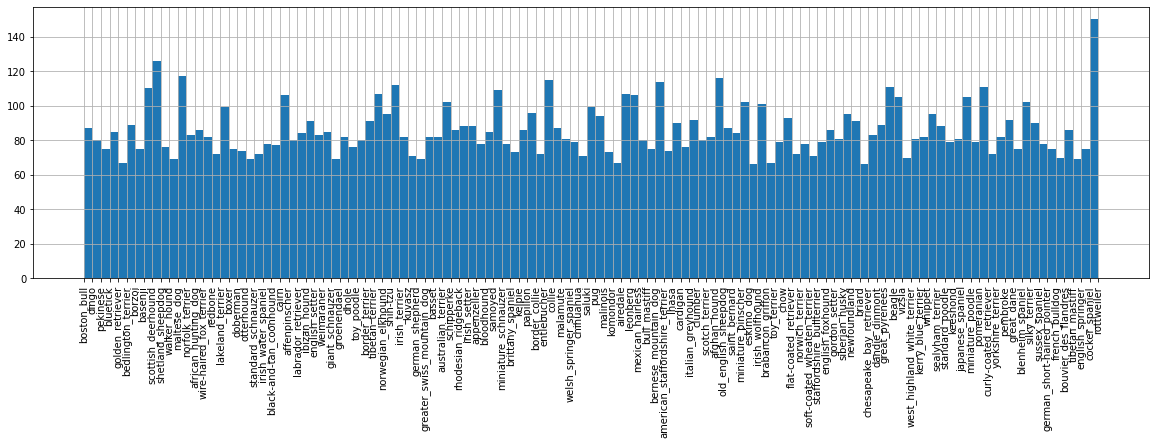

In [ ]:
labels['breed'].hist(bins = labels['breed'].unique() , xrot = 90 , figsize = (20 ,5) )

So , there is no prominent data imbalance among the clases except rottweller class .  

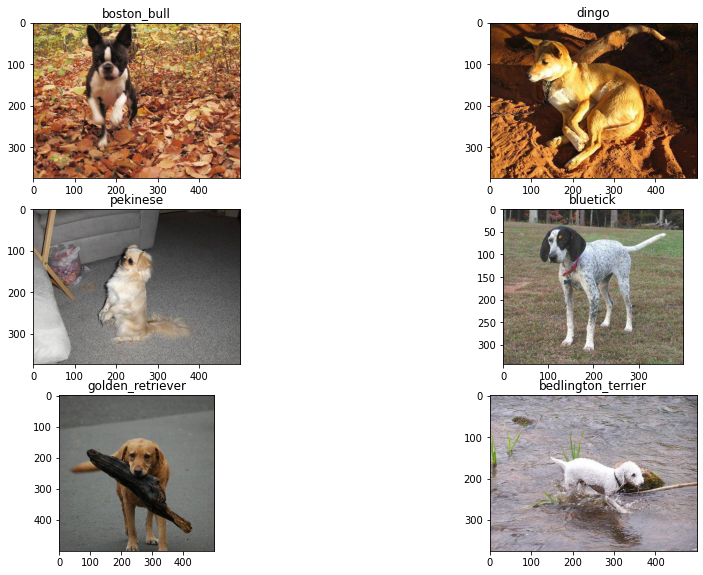

In [ ]:
import os
import cv2
plt.figure(figsize=(15,20))
i=1
for idx,s in labels.head(6).iterrows():
    img_path = os.path.join('/content/train',s['id']+'.jpg')
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig=plt.subplot(6,2,i)
    fig.imshow(img)
    fig.set_title(s['breed'])
    i+=1

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(max_depth=2, random_state=1)
gb_classifier.fit(op_flat_svm, Y_train)
gb_pred = gb_classifier.predict(x_test[:, [4,7,11]])

gb_acc = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

print('maximum accuracy = ' + str(gb_acc))
print('confusion matrix = ')
print(gb_cm)
algo_accuracy_record.append(['GradientBoostingClassifier', gb_acc])
# 0.911 without sc

# Random Forest

In [ ]:
import os
import numpy as np # For linear algebric opeartions
import pandas as  pd
import matplotlib.pyplot as plt # For data visualization . 
import seaborn as sns


In [ ]:
train_dir = '/content/train/' 
test_dir = '/content/test'

In [ ]:
import tensorflow

In [ ]:
inception =tensorflow.keras.applications.InceptionV3(
        weights='imagenet', #weights asocited with imagenet dataset is being captured.
        include_top=False ,#the ANN part of the InceptionV3 is excluded
        input_shape=(96 , 96 ,3))

In [ ]:
train_labels = labels.assign(img_path=lambda x: train_dir + x['id']+'.jpg')


In [ ]:
train_labels

,id,breed,img_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/train/000bec180eb18c7604dcecc8fe0dba0...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/train/001513dfcb2ffafc82cccf4d8bbaba9...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/train/001cdf01b096e06d78e9e5112d41939...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/train/00214f311d5d2247d5dfe4fe24b2303...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/train/0021f9ceb3235effd7fcde7f7538ed6...
...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi,/content/train/ffd25009d635cfd16e793503ac5edef...
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont,/content/train/ffd3f636f7f379c51ba3648a9ff8254...
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale,/content/train/ffe2ca6c940cddfee68fa3cc6c63213...
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher,/content/train/ffe5f6d8e2bff356e9482a80a6e29aa...


In [ ]:
train_labels.img_path[1] # checking the path .

'/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

In [ ]:
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
X=np.array([img_to_array(load_img(img,target_size=(96,96))) for img in train_labels['img_path'].values.tolist()])
X.shape

(10222, 96, 96, 3)

In [ ]:
X

array([[[[167., 111.,  64.],
         [176., 136.,  77.],
         [160., 116.,  45.],
         ...,
         [206., 186.,  53.],
         [210., 179.,  96.],
         [167., 135.,  58.]],

        [[128.,  92.,  58.],
         [187., 153., 116.],
         [151., 106.,  73.],
         ...,
         [210., 169.,  55.],
         [191., 150.,  84.],
         [225., 189.,  79.]],

        [[195., 140.,  75.],
         [162., 102.,  39.],
         [167., 108.,  68.],
         ...,
         [192., 128.,  22.],
         [193., 148.,  67.],
         [194., 150.,  63.]],

        ...,

        [[190., 121.,  80.],
         [191., 132.,  74.],
         [146.,  92.,  54.],
         ...,
         [196., 130.,  98.],
         [119.,  47.,  23.],
         [120.,  49.,  21.]],

        [[183., 116.,  63.],
         [186., 123.,  72.],
         [187., 125.,  76.],
         ...,
         [202., 134.,  85.],
         [119.,  61.,  37.],
         [225., 171., 125.]],

        [[183., 116.,  63.],
       

In [ ]:
Y=pd.get_dummies(train_labels['breed'])
Y.shape

(10222, 120)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in train_labels.breed:
  Y_le = le.fit_transform(train_labels.breed)

In [ ]:
Y_le.shape

(10222,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_le,test_size=0.5)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5111, 96, 96, 3) (5111,)
(5111, 96, 96, 3) (5111,)


In [ ]:
Y_train

array([ 0, 90, 52, ..., 92, 13, 58])

In [ ]:
op_inc = inception(X_train)
op_inc_test = inception(X_test)

In [ ]:
from tensorflow.keras import layers

op_flat = layers.Flatten()(op_inc)
op_flat = layers.Dropout(0.5)(op_flat)

op_flat_test = layers.Flatten()(op_inc_test)
op_flat_test = layers.Dropout(0.5)(op_flat_test)

In [ ]:
op_flat.shape

TensorShape([5111, 2048])

In [ ]:
type(op_flat_test)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
op_flat_in  = np.array(op_flat)
op_flat_test = np.array(op_flat_test)

In [ ]:
op_flat_test.shape

(5111, 2048)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
op_flat_rf = scaler.fit_transform(op_flat_in)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_cm = []
i = 0
# for num_trees in range(1, 50):
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(op_flat_rf, Y_train)
i+=1
print(i)

rf_pred = rf_classifier.predict(op_flat_test)

rf_acc.append(accuracy_score(Y_test,rf_pred))
# rf_cm.append(confusion_matrix(Y_test,rf_pred))

max_acc = max(rf_acc)
# max_acc_cm = rf_cm[rf_acc.index(max_acc)]
print('maximum accuracy = ' + str(max_acc))
# print('confusion matrix = ')
# print(max_acc_cm)
# algo_accuracy_record.append(['RandomForestClassifier', max_acc])
# 0.933 without sc


1
maximum accuracy = 0.010369790647622775


# SVM

In [ ]:
op_flat_in[1 , :]

array([ 70.09716,   0.     ,   0.     , ...,  97.33824, 161.84065,
        26.48428], dtype=float32)

In [ ]:
Y_train.shape

(5111,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
op_flat_svm = scaler.fit_transform(op_flat_in)
op_flat_svm_test = scaler.fit_transform(op_flat_test)

In [ ]:
op_flat_svm_test.shape

(5111, 2048)

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC

svc_classifier = SVC(kernel = 'linear', random_state = 0 ,
                     decision_function_shape='ovo' ,max_iter = 2000)
svc_classifier.fit(op_flat_svm, Y_train)
svc_pred = svc_classifier.predict(op_flat_svm_test)
svc_acc = accuracy_score(Y_test, svc_pred)
# svc_cm = confusion_matrix(Y_test, svc_pred)
print(svc_acc)
# print(svc_cm)
# algo_accuracy_record.append(['SupportVectorClassifier', svc_acc])
# 0.9 without sc


0.0283701819604774


## CatBoost

In [ ]:
# CatBoost Classifier 
# ! pip install catboost
from catboost import CatBoostClassifier

cat_classifier = CatBoostClassifier()
cat_classifier .fit(op_flat_svm, Y_train)
cat_pred = cat_classifier.predict(op_flat_svm_test)

cat_acc = accuracy_score(y_test, cat_pred)
cat_cm = confusion_matrix(y_test, cat_pred)

print('maximum accuracy = ' + str(cat_acc))
print('confusion matrix = ')
print(cat_cm)
algo_accuracy_record.append(['CatBoostClassifier', cat_acc])
# 0.911 without sc

11:	learn: 4.5668424	total: 11m 51s	remaining: 16h 16m 57s
12:	learn: 4.5498548	total: 12m 51s	remaining: 16h 16m 22s
13:	learn: 4.5313937	total: 13m 51s	remaining: 16h 16m 2s


KeyboardInterrupt: ignored

# Gradient Boosting

# Inception + ANN

In [ ]:
labels_alt = labels.copy()

CPU times: user 1.46 s, sys: 167 ms, total: 1.63 s
Wall time: 1.65 s


In [ ]:
%%time
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  
                                  horizontal_flip = True,
                                  
                                  validation_split=0.02  # Only 2% imges are being used for validation.
                                  )

CPU times: user 137 µs, sys: 21 µs, total: 158 µs
Wall time: 161 µs


In [ ]:
BATCH_SIZE = 32

In [ ]:
image_size=(299,299) # size of input image .

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=labels_alt,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb" 
)

Found 10018 validated image filenames belonging to 120 classes.


In [ ]:
valid_generator=train_datagen.flow_from_dataframe(
dataframe=labels_alt,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb")


Found 204 validated image filenames belonging to 120 classes.


In [ ]:
shape=[299,299,3] # input image shape.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pretrained_model = tf.keras.applications.InceptionV3(
        weights='imagenet', #weights asocited with imagenet dataset is being captured.
        include_top=False ,#the ANN part of the InceptionV3 is excluded
        input_shape=shape
    )
pretrained_model.trainable = False # making all the layers of the inception model as Non-Trainable
    
model = tf.keras.Sequential([ 
        pretrained_model,   
        tf.keras.layers.GlobalAveragePooling2D(), # using GlobalAveragePooling 
        #tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
        
    ])

TypeError: ignored

*Here , I have used all the layers of the Inception_V3 model and then taking average pooling of the output of Inception_V3.*

To Know more about GlobalAveragePooling :

[Global Average Pooling](https://arxiv.org/abs/1312.4400v3)





In [ ]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.001) and momenbtum = 0.9 .
opt=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               245880    
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Most of the parameters are in the non-trainable regime contributed from inception_V3. \\


In [ ]:
print('the number of the traning images : ',train_generator.n) 
print('Batch_size : ' ,valid_generator.batch_size ) 

the number of the traning images :  10018
Batch_size :  32


In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
# STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    )

Epoch 1/25


KeyboardInterrupt: ignored

In [ ]:
'''
def training_testing_graph(x , title ):
  plt.subplots(figsize=(10,5), facecolor='#F0F0F0')
  plt.plot(x)
  plt.legend(x.name)
  plt.title('MODEl' , +title)
'''

## Accuracy Plot

In [ ]:
plt.subplots(figsize=(10,5), facecolor='#F0F0F0')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training' ,'validation' ] , loc = 'best')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

## Loss Plot

In [ ]:
plt.subplots(figsize=(10,5), facecolor='#F0F0F0')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training' ,'validation' ] , loc = 'best')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# to save the weights
model.save_weights('D_B_C_weights.h5')

In [ ]:
# to save the architecture of the model

with open('D_B_C_Arch.json' , 'w') as f:
  f.write(model.to_json())